Desafio 19: Reclamações em Serviços Públicos

📂 Dataset: Banco de dados com reclamações de moradores sobre serviços públicos em diferentes bairros.
Colunas: ID, Serviço, Bairro, Prioridade, Status, Dias_Em_Andamento, Data_Abertura

🎯 Atividades:

Qual o serviço mais reclamado no total?

Quantas reclamações estão com prioridade "Alta" e ainda abertas?

Qual é o tempo médio (em dias) que as reclamações demoram para serem resolvidas?

Qual bairro possui o maior número de reclamações em andamento?

Crie um gráfico de barras horizontais com o número de reclamações por tipo de serviço, agrupado por status (Aberta, Em Andamento, etc).

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dia_19_reclamacoes_servicos_publicos.csv")
df.head()

,ID,Serviço,Bairro,Prioridade,Status,Dias_Em_Andamento,Data_Abertura
0,1,Energia Elétrica,Vila Nova,Alta,Aberta,34,2024-01-01
1,2,Coleta de Lixo,Jardim das Flores,Alta,Resolvida,0,2024-01-02
2,3,Energia Elétrica,Bairro Alto,Alta,Encerrada,41,2024-01-03
3,4,Coleta de Lixo,Jardim das Flores,Alta,Resolvida,57,2024-01-04
4,5,Transporte Público,Residencial Sul,Média,Encerrada,59,2024-01-05


In [4]:
#Qual o serviço mais reclamado no total?
servicoReclamado = df["Serviço"].value_counts()
print(f"{servicoReclamado.idxmax()} foi o serviço mais reclamado, com um total de {servicoReclamado.max()} reclamações.")

Transporte Público foi o serviço com mais reclamado, com um total de 23 reclamações.


In [14]:
#Quantas reclamações estão com prioridade "Alta" e ainda abertas?
prioridadeAltaAberta = df[(df["Prioridade"] == "Alta") & (df["Status"] == "Aberta")]
print(f"{prioridadeAltaAberta['Serviço'].value_counts().sum()} Reclamações com prioridade 'Alta' e ainda aberta")

4 Reclamações com prioridade 'Alta' e ainda aberta


In [23]:
#Qual é o tempo médio (em dias) que as reclamações demoram para serem resolvidas?
reclamacoesResolvidas = df[df["Status"] == "Resolvida"]
diasReclamacoes = reclamacoesResolvidas["Dias_Em_Andamento"].mean()
print(f"Tempo médio de resolução: {diasReclamacoes:.2f} dias")

Tempo médio de resolução: 29.38 dias


In [30]:
#Qual bairro possui o maior número de reclamações em andamento?
reclacaoAndamento = df[df["Status"] == "Em Andamento"]
bairroReclamacoes = reclacaoAndamento["Bairro"].value_counts()
print(f"O bairro com mais reclamações em andamento é: {bairroReclamacoes.idxmax()} com {bairroReclamacoes.max()} reclamações")

O bairro com mais reclamações em andamento é: Centro com 6 reclamações


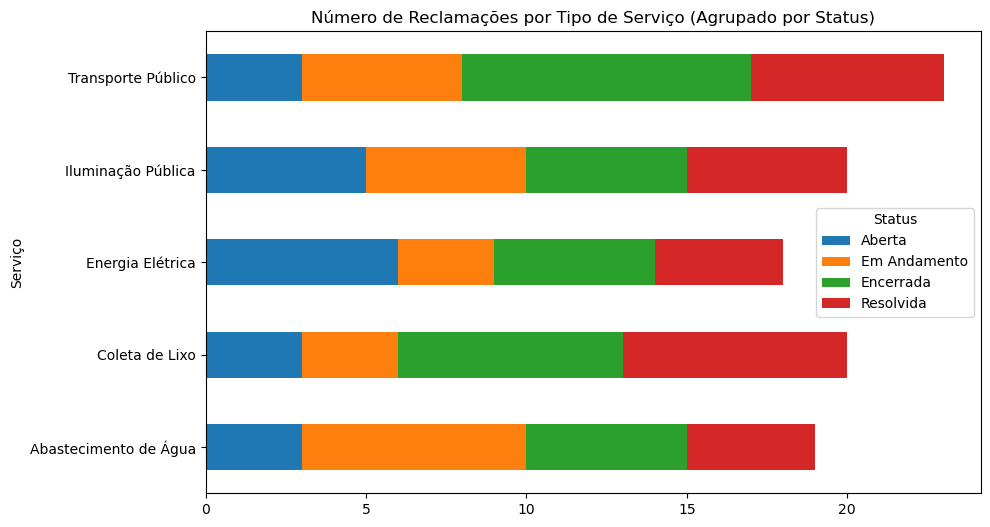

In [49]:
#Crie um gráfico de barras horizontais com o número de reclamações por tipo de serviço, agrupado por status (Aberta, Em Andamento, etc).
reclamcoesServicosStatus = df.groupby(['Serviço', 'Status']).size().unstack(fill_value=0)
reclamcoesServicosStatus.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Número de Reclamações por Tipo de Serviço (Agrupado por Status)')
plt.show()